# Quick download and analyze HSC image

This notebook allow you to:
    * Quickly download HSC image data, PSF 
    * Start automatic fitting based on the photutils/sep detection 
    * Present the fitting results
    * Calculate the astrometry 
    * Remove the inferred image from the original FOV
    * Adopt statmorph to analyze non-parameterized measurements ()

### In fact, you can simply input RA and Dec information for the target and all fittings will be performed by itself! 

This notebook requires standard python libraries and the publicly available packages on github: See https://github.com/dartoon/galight/blob/master/requirements.txt

This notebook has been tested with galight == 0.1.2

For more information, please contact me: dingxuheng@126.com

## Download HSC data and PSF
Note that your HSC account ID and password are be needed if you don't have os.getenv('SSP_IDR_USR') and os.getenv('SSP_IDR_PWD') in the source evnironment.

You can decide how many bands to download in this fitting task by setting bands. The downloaded files will be saved in a folder named after the object_id.

In [2]:
import numpy as np
import astropy.io.fits as pyfits
import matplotlib.pyplot as plt

object_id,ra,dec= 'Obj_ID', 38.435031, -1.8452475  #Give a name for your target with its RA Dec information.
# object_id,ra,dec= '144920.71+422101.2', '14:49:20.71', '42:21:01.2' #RA Dec can also give in HOUR unit.

#Import hsc data download tool (Credit: Connor Bottrell, https://github.com/cbottrell)
from galight.hsc_utils import hsc_image, hsc_psf

#Select which data you plan to download
dr='dr4'
# rerun='s21a_dud'  #Deep or UltraDeep
rerun='s21a_wide'  #Wide 

#Select how many bands you plan to Download (G R I Z Y)
bands = 'GRIZY'  #Band that will be download

import os, glob
#%%Mkdir folder and start downloading
if not os.path.exists(object_id):
    os.makedirs(object_id)
out_dir='./' + object_id
print('Downloading data with PSF... ... ...')
hsc_image.get_cutouts(object_id,ra,dec,out_dir,dr=dr,rerun=rerun,filters=bands,fov_arcsec=120)
hsc_psf.get_psfs(object_id,ra,dec,out_dir,dr=dr,rerun=rerun,filters=bands)
print('Downloading Finished!')


## Set how do you plan to run your fit.
You need to make decision on how the fitting is performed. Such as:
    * How many point sources you want to place in the fitting? (point_source_num)
    * Do you want to set a leading band (e.g., I band) to fit first, then fix the Re and sersic_n for the other band? (lband, fix_n, fix_re)
    * How do you want you fitting to be performed, use more PSO or MCMC particles with more steps? (fitting_level)
    

In [2]:
point_source_num = 1  #Number for Point sources (AGNs, or stars) in the target. 0 means no PS.
fitting_level='deep' #shallow, deep
lband = 'I' #The band fitting first and can also fit n and Re for other band.
fix_n, fix_re = True, True  #Fix sersic n and Re based on I band fitting.

Fitting using GaLight... ... ...
Estimating the background light ... ... ...


        Use `~photutils.segmentation.SourceCatalog` instead. [galight.tools.measure_tools]
        Use `~photutils.segmentation.SourceCatalog` instead. [photutils.segmentation.properties]
        Use `~photutils.segmentation.SourceCatalog` instead. [photutils.segmentation.properties]


Estimating the background light ... ... ...


        Use `~photutils.segmentation.SourceCatalog` instead. [galight.tools.measure_tools]
        Use `~photutils.segmentation.SourceCatalog` instead. [photutils.segmentation.properties]
        Use `~photutils.segmentation.SourceCatalog` instead. [photutils.segmentation.properties]


Estimating the background light ... ... ...


        Use `~photutils.segmentation.SourceCatalog` instead. [galight.tools.measure_tools]
        Use `~photutils.segmentation.SourceCatalog` instead. [photutils.segmentation.properties]
        Use `~photutils.segmentation.SourceCatalog` instead. [photutils.segmentation.properties]


Estimating the background light ... ... ...


        Use `~photutils.segmentation.SourceCatalog` instead. [galight.tools.measure_tools]
        Use `~photutils.segmentation.SourceCatalog` instead. [photutils.segmentation.properties]
        Use `~photutils.segmentation.SourceCatalog` instead. [photutils.segmentation.properties]


Estimating the background light ... ... ...


        Use `~photutils.segmentation.SourceCatalog` instead. [galight.tools.measure_tools]
        Use `~photutils.segmentation.SourceCatalog` instead. [photutils.segmentation.properties]
        Use `~photutils.segmentation.SourceCatalog` instead. [photutils.segmentation.properties]
        Use `~photutils.segmentation.SourceCatalog` instead. [galight.tools.measure_tools]
        Use `~photutils.segmentation.SourceCatalog` instead. [photutils.segmentation.properties]
        Use `~photutils.segmentation.SourceCatalog` instead. [photutils.segmentation.properties]
        Use `~photutils.segmentation.SourceCatalog` instead. [galight.tools.measure_tools]
        Use `~photutils.segmentation.SourceCatalog` instead. [photutils.segmentation.properties]
        Use `~photutils.segmentation.SourceCatalog` instead. [photutils.segmentation.properties]
        Use `~photutils.segmentation.SourceCatalog` instead. [galight.tools.measure_tools]
        Use `~photutils.segmentation.SourceCatalog` in

Staring fitting band-I... ... ...
The settings for the fitting is done. Ready to pass to FittingProcess. 
  However, please make updates manullay if needed.


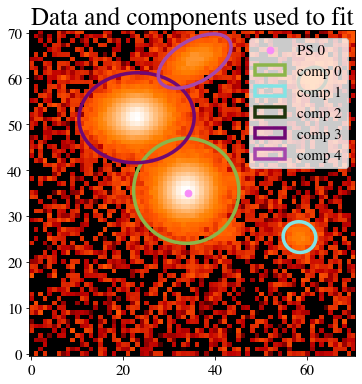

Computing the PSO ...
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
Max iteration reached! Stopping.
-2.4076537934593385 reduced X^2 of best position
-6022.7459643385355 logL
5003.0 effective number of data points
[] lens result
[] source result
[{'amp': 1, 'R_sersic': 0.6246910519624379, 'n_sersic': 8.521289083038775, 'e1': -0.1415488428132017, 'e2': 0.02007091828693167, 'center_x': 0.34168685715880814, 'center_y': 0.10757981646666005}, {'amp': 1, 'R_sersic': 0.26261211216426716, 'n_sersic': 2.3130227679088846, 'e1': -0.1523604616678032, 'e2': 0.4890369700196987, 'center_x': -3.9165412077050856, 'center_y': -1.5860665262877616}, {'amp': 1, 'R_sersic': 0.27952567963183556, 'n_sersic': 1.0745438185877962, 'e1': -0.49491867185152816, 'e2': -0.30998115521746705, 'center_x': -4.452103314740287, 'center_y': 4.272212020427509}, {'amp': 1, 'R_sersic': 0.03363915571096902, 'n_sersic': 8.074033820073868, 'e1': 0.47597205299265116, 'e2': -0.06527434837344331, 'center_x': 2.0885680570882896,

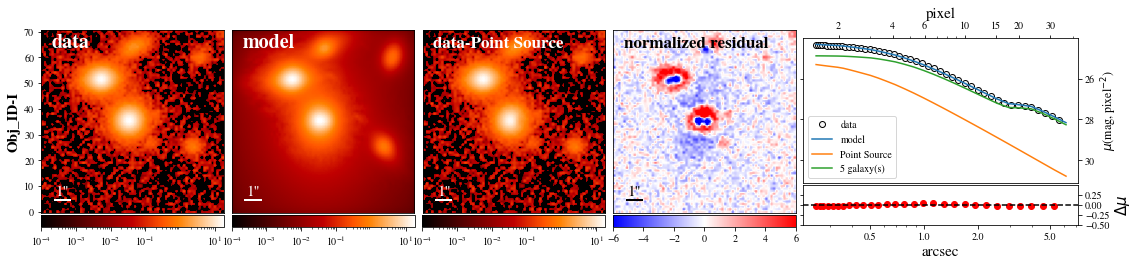

Staring fitting band-G... ... ...
The settings for the fitting is done. Ready to pass to FittingProcess. 
  However, please make updates manullay if needed.


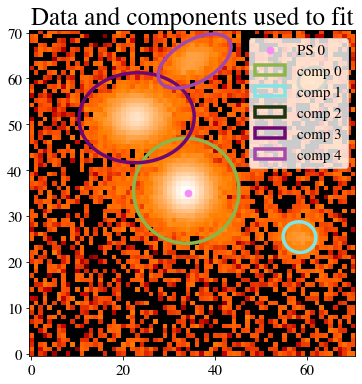

Computing the PSO ...
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
Max iteration reached! Stopping.
-1.0796571978803746 reduced X^2 of best position
-2701.8421376956376 logL
5005.0 effective number of data points
[] lens result
[] source result
[{'amp': 1, 'R_sersic': 0.6246910519624379, 'n_sersic': 8.521289083038775, 'e1': 0.09664493614614983, 'e2': -0.05376417713873528, 'center_x': 0.17827869434661636, 'center_y': 0.0597252914401549}, {'amp': 1, 'R_sersic': 0.20505326920527212, 'n_sersic': 0.6097412211005215, 'e1': 0.45301027697041985, 'e2': 0.16309240615096554, 'center_x': -3.8987136219587324, 'center_y': -1.5761343785225412}, {'amp': 1, 'R_sersic': 0.866231894533077, 'n_sersic': 5.0278480918862085, 'e1': 0.2738606182038415, 'e2': -0.16379805547993234, 'center_x': -4.378327017648184, 'center_y': 4.369163928229975}, {'amp': 1, 'R_sersic': 0.17624086106923406, 'n_sersic': 2.4775767248928626, 'e1': 0.4009587370163036, 'e2': -0.05388619235274504, 'center_x': 2.0843918686471077, 'c

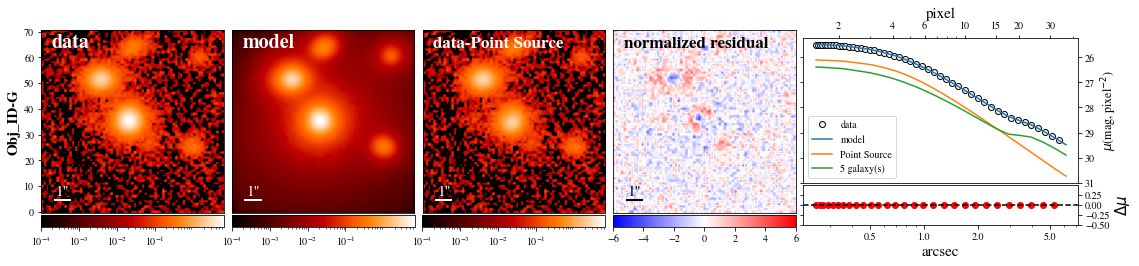

Staring fitting band-R... ... ...
The settings for the fitting is done. Ready to pass to FittingProcess. 
  However, please make updates manullay if needed.


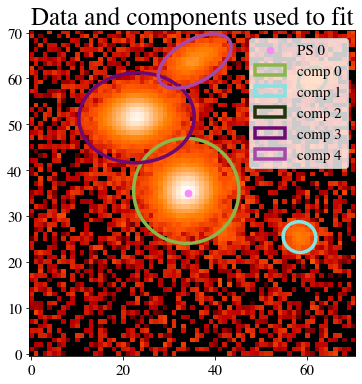

Computing the PSO ...
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
Max iteration reached! Stopping.
-1.4998786866034337 reduced X^2 of best position
-3753.446413225093 logL
5005.0 effective number of data points
[] lens result
[] source result
[{'amp': 1, 'R_sersic': 0.6246910519624379, 'n_sersic': 8.521289083038775, 'e1': -0.05327347065998167, 'e2': 0.02452264594471966, 'center_x': 0.22005749618265888, 'center_y': 0.11886390969068338}, {'amp': 1, 'R_sersic': 0.14058689528810095, 'n_sersic': 1.8515737802866319, 'e1': -0.0832056241602313, 'e2': 0.299508019575738, 'center_x': -3.918060462312136, 'center_y': -1.5634888605343857}, {'amp': 1, 'R_sersic': 0.2436563354327334, 'n_sersic': 2.113953943952214, 'e1': 0.06197830572663128, 'e2': -0.3749278158382759, 'center_x': -4.375608942949975, 'center_y': 4.1947648358679706}, {'amp': 1, 'R_sersic': 0.1952654038144495, 'n_sersic': 2.242252271464989, 'e1': 0.3459705911826602, 'e2': -0.04593541426101882, 'center_x': 2.0764739066777342, 'cente

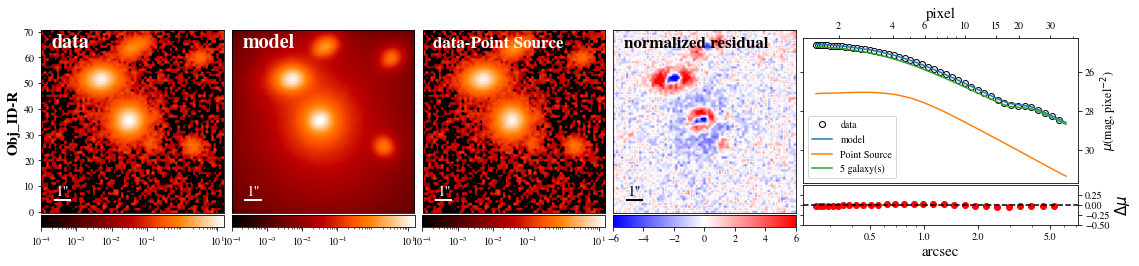

Staring fitting band-Z... ... ...
The settings for the fitting is done. Ready to pass to FittingProcess. 
  However, please make updates manullay if needed.


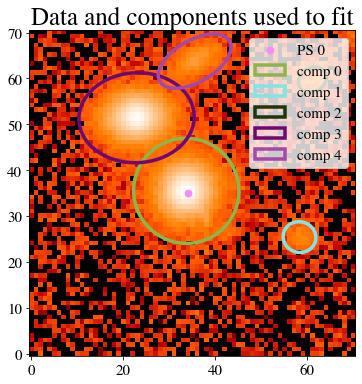

Computing the PSO ...
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
Max iteration reached! Stopping.
-1.6851564907725647 reduced X^2 of best position
-4217.104118158343 logL
5005.0 effective number of data points
[] lens result
[] source result
[{'amp': 1, 'R_sersic': 0.6246910519624379, 'n_sersic': 8.521289083038775, 'e1': -0.02783351663830357, 'e2': 0.14759841256921968, 'center_x': 0.21740175664159203, 'center_y': 0.16301903764986614}, {'amp': 1, 'R_sersic': 0.02094992432657164, 'n_sersic': 1.5323040583978433, 'e1': 0.10380598711700462, 'e2': -0.24376816062303028, 'center_x': -3.9251641100305297, 'center_y': -1.4950127366881911}, {'amp': 1, 'R_sersic': 0.5971403793977014, 'n_sersic': 3.0451524158828467, 'e1': 0.17222996179592676, 'e2': -0.00037234932986663846, 'center_x': -4.316524714526387, 'center_y': 4.146798149915022}, {'amp': 1, 'R_sersic': 0.031787313923882635, 'n_sersic': 8.994155189102742, 'e1': 0.4023274090400606, 'e2': -0.06975233008898113, 'center_x': 2.09424734148259

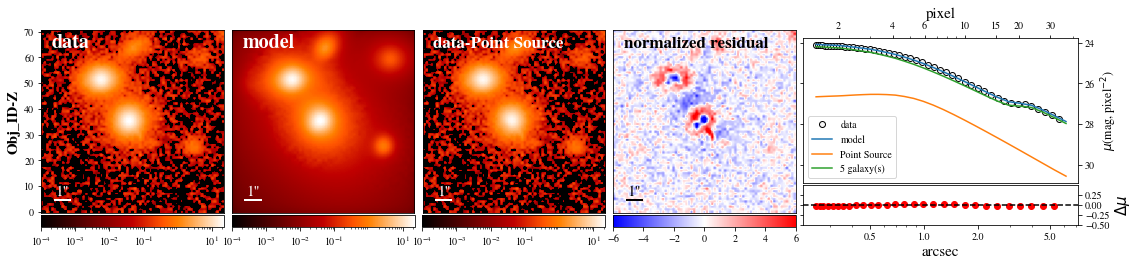

Staring fitting band-Y... ... ...
The settings for the fitting is done. Ready to pass to FittingProcess. 
  However, please make updates manullay if needed.


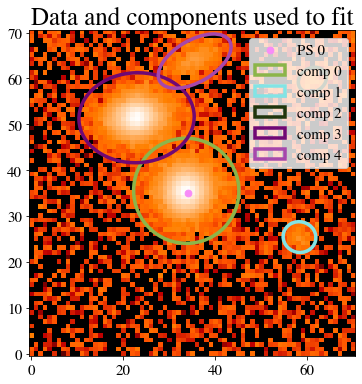

Computing the PSO ...
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
Max iteration reached! Stopping.
-1.1590293760948371 reduced X^2 of best position
-2900.47101367733 logL
5005.0 effective number of data points
[] lens result
[] source result
[{'amp': 1, 'R_sersic': 0.6246910519624379, 'n_sersic': 8.521289083038775, 'e1': -0.05671298298852908, 'e2': -0.01846942576194828, 'center_x': 0.29027204682374697, 'center_y': 0.1108342083321364}, {'amp': 1, 'R_sersic': 0.05745246803527178, 'n_sersic': 2.7519344711346196, 'e1': 0.17506687591781844, 'e2': 0.14554094263156267, 'center_x': -3.8916064172115385, 'center_y': -1.6099633203318575}, {'amp': 1, 'R_sersic': 0.06282962159636968, 'n_sersic': 4.288475814995884, 'e1': 0.4981737796557132, 'e2': -0.23272125053559295, 'center_x': -4.564507213222046, 'center_y': 4.100797043689857}, {'amp': 1, 'R_sersic': 0.18325059637496216, 'n_sersic': 2.209586259391093, 'e1': 0.3481676807644083, 'e2': -0.0583303093313155, 'center_x': 2.0833886044081416, 'cen

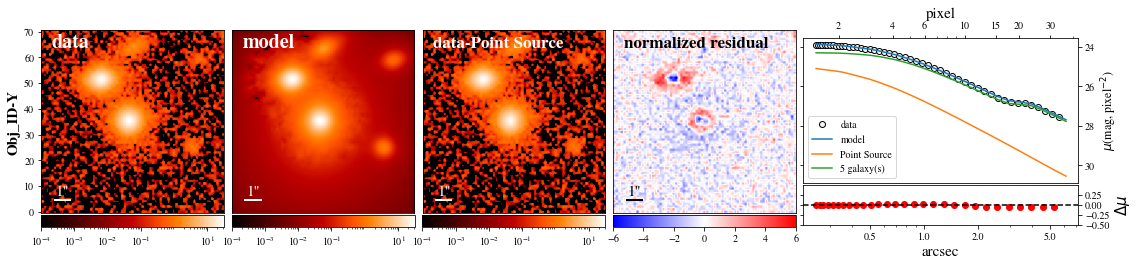

In [3]:
#%%use galight to analyze:
from galight.data_process import DataProcess
from galight.fitting_specify import FittingSpecify
from galight.fitting_process import FittingProcess
print('Fitting using GaLight... ... ...')
if isinstance(ra, str) or isinstance(dec, str):
    from astropy.coordinates import SkyCoord
    from astropy import units as u
    pos = SkyCoord('{0} {1}'.format(ra, dec), unit=(u.hourangle, u.deg))
    ra, dec = pos.ra.degree, pos.dec.degree

data_process_list = []
for band in bands:
    fitsFile = pyfits.open(glob.glob(object_id+'/*-cutout-HSC-{0}*.fits'.format(band))[0])
    file_header0 = fitsFile[0].header
    try:
        FLUXMAG0 = file_header0['FLUXMAG0']
        zp =  2.5 * np.log10(FLUXMAG0)   # This is something Xuheng can't make sure.
    except:
        zp = 27.0
    PSF_file = glob.glob(object_id+'/*-psf*HSC-{0}*.fits'.format(band))[0]
    PSF = pyfits.getdata(PSF_file)
    data_process = DataProcess(fov_image = fitsFile[1].data, fov_noise_map = fitsFile[3].data ** 0.5, target_pos = [ra, dec],
                                pos_type = 'wcs', header = fitsFile[1].header,
                                rm_bkglight = True, if_plot=False, zp = zp)
    data_process.generate_target_materials(radius=None)
    data_process.PSF_list = [PSF]
    data_process_list.append(data_process)
#%% Determining the common settings for all bands, including cutout radius and apertures.
run_list = [i for i in range(len(bands))]
if 'lband' in locals():
    l_idx = [i for i in range(len(bands)) if bands[i] == lband][0]  #The first index to run
    del(run_list[l_idx])
    run_list = [l_idx] + run_list  #The list define the order to run     
cut_radius = np.median([int(len(data_process_list[i].target_stamp)/2) for i in range(len(data_process_list))])
for i in range(len(bands)):    
    data_process_list[i].generate_target_materials(radius=cut_radius, create_mask = False, nsigma=2.8,
                                          exp_sz= 1.2, npixels = 15, if_plot=False)
    data_process_list[i].checkout()
apertures = data_process_list[l_idx].apertures


from galight.tools.measure_tools import mask_obj   
apertures = data_process_list[l_idx].apertures
for i in run_list:
    if i != l_idx:
        covers = mask_obj(data_process_list[i].target_stamp, apertures, if_plot=False, sum_mask = True)
        for j in range(len(data_process_list[i].apertures)):
            try:
                new_cover = mask_obj(data_process_list[i].target_stamp, [data_process_list[i].apertures[j]], if_plot=False, sum_mask = True)
                #If 1/2 of the area covered by the aperture is new)
                if np.sum(covers - new_cover*covers) > np.sum(1-new_cover)/2 :               
                    apertures.append(data_process_list[i].apertures[j])
            except:  #Folloing except will remove after 0.1.3 version.
                positions = [apertures[k].positions for k in range(len(apertures)) ]
                dists = [np.sqrt((np.sum(data_process_list[i].apertures[j].positions - 
                                  positions[k]))**2) for k in range(len(apertures))]
                if np.min(dists)>2:
                    apertures.append(data_process_list[i].apertures[j])
                
                
fit_sepc_l, fit_run_l = [None]*5, [None]*5
for i in run_list:  
    band = bands[i]
    print("Staring fitting band-"+band+"... ... ...")
    data_process_list[i].apertures = apertures #Pass apertures to the data
    fit_sepc_l[i] = FittingSpecify(data_process_list[i])
    fix_n_list, fix_Re_list = None, None
    if i != l_idx:
        if fix_n == True:
            fix_n_list = [[0,fit_run_l[l_idx].final_result_galaxy[0]['n_sersic'] ]]
        if fix_re == True:
            fix_Re_list = [[0,fit_run_l[l_idx].final_result_galaxy[0]['R_sersic'] ]]
    fit_sepc_l[i].prepare_fitting_seq(point_source_num = point_source_num, supersampling_factor=3, 
                                      fix_n_list= fix_n_list, fix_Re_list=fix_Re_list)
    fit_sepc_l[i].plot_fitting_sets(object_id+'/fitconfig-band-{0}.png'.format(band))
    fit_sepc_l[i].build_fitting_seq()
    fit_run_l[i] = FittingProcess(fit_sepc_l[i], savename = object_id+'/result-band-{0}'.format(band), fitting_level=fitting_level)
    fit_run_l[i].run(algorithm_list = ['PSO'], setting_list=[None])
    # fit_run.plot_all(target_ID = object_id)
    if fit_run_l[i].image_ps_list != []:
        fit_run_l[i].plot_final_qso_fit(save_plot=True, target_ID= object_id +'-'+ band )
    else:
        fit_run_l[i].plot_final_galaxy_fit(save_plot=True, target_ID= object_id +'-'+ band )
    
    fit_run_l[i].dump_result()
        

### For further analysis, you can direct work with the result material (i.e., fit_run_l[i]).

### Alternatively, you can reload the fitting using pkl on another terminal/machine. Note that the name of the file should be same to reload using pickle. 

The following plots/calculations are performed:


 Based on fitting result, calculate the astrometry information for all the objects. (cal_astrometry)

In [2]:
# You can directly run this cell next time after you have saved the pickle. 
import pickle
import glob
import numpy as np
# import astropy.io.fits as pyfits
import matplotlib.pyplot as plt
#Give the same object ID
object_id = 'Obj_ID' #Obj ID will be reloaded
bands = 'GRIZY'  #Bands that will be reloaded

reload = []
for band in bands:
    filename = glob.glob(object_id+'/*band-{0}*pkl'.format(band))[0]  #For example, reload I band result, which is fit_run_l[2]
    reload.append(pickle.load(open(filename,'rb')) )

#Calcualte the Re and Dec of the fitting based on I band inference:
reload[2].cal_astrometry()
print('Ra Dec of each galaxy:',[reload[2].final_result_galaxy[i]['wcs_RaDec'] for i in range(len(reload[2].final_result_galaxy))])
print('Ra Dec of the PS:',reload[2].final_result_ps[0]['wcs_RaDec'])

Ra Dec of each galaxy: [(38.435088695947144, -1.8451977269319109), (38.43390515236649, -1.845668020440761), (38.433756576431016, -1.84404070812709), (38.43557432015471, -1.8444494580933928), (38.43498614895496, -1.8438789479168223)]
Ra Dec of the PS: (38.43498655712923, -1.8451938847040028)


### Galight can also work with statmorph: (cal_statmorph)

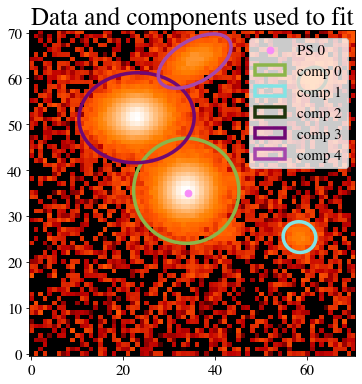

Which obj to measure using statmorph?
0


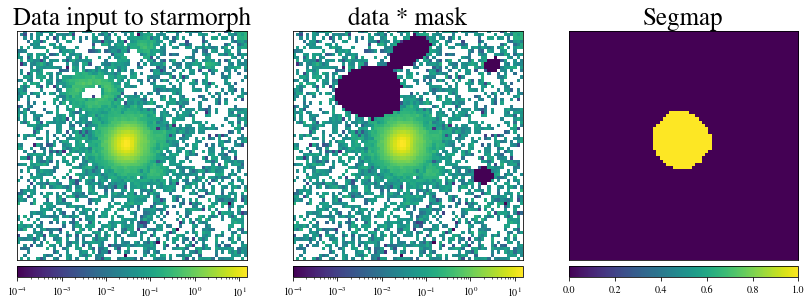

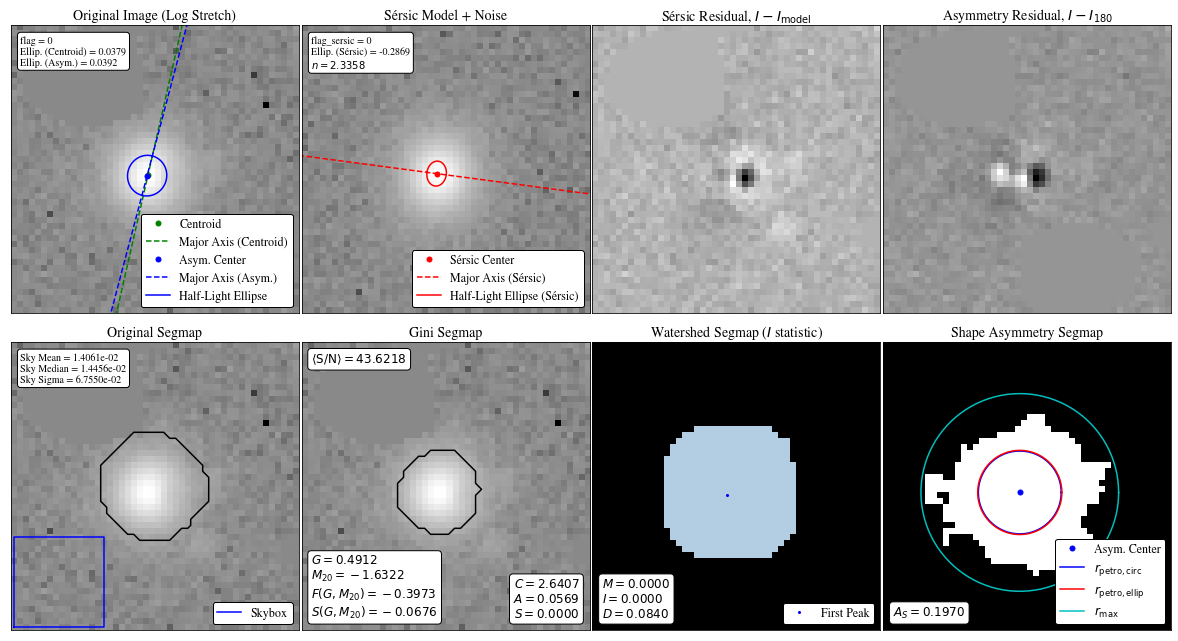

xc_asymmetry = 33.23935991099124
yc_asymmetry = 35.474432159085545
ellipticity_asymmetry = 0.03921242389667379
elongation_asymmetry = 1.0408127924131867
orientation_asymmetry = 1.3125763007627498
C = 2.640728503675536
A = 0.05685466637665456
S = 0.0


In [3]:
# To re-plot the fitting.
#reload[2].plot_final_qso_fit()

reload[2].fitting_specify_class.plot_fitting_sets()
obj_id = int(input('Which obj to measure using statmorph?\n'))

morph = reload[2].cal_statmorph(obj_id=obj_id, segm=reload[2].fitting_specify_class.segm_deblend , if_plot = True)

# #Note that in cal_statmorph, the segm can be re-created to input. For example:
# from galight.tools.measure_tools import detect_obj
# _, segm_deblend = detect_obj(reload[2].fitting_specify_class.kwargs_data['image_data'], if_plot= True, 
#                             err=reload[2].fitting_specify_class.kwargs_data['noise_map'], 
#                             segm_map= True, nsigma=1)
# morph = reload[2].cal_statmorph(obj_id=obj_id, segm=segm_deblend , if_plot = True)

from statmorph.utils.image_diagnostics import make_figure
fig = make_figure(morph)
plt.show()
print('xc_asymmetry =', morph.xc_asymmetry)
print('yc_asymmetry =', morph.yc_asymmetry)
print('ellipticity_asymmetry =', morph.ellipticity_asymmetry)
print('elongation_asymmetry =', morph.elongation_asymmetry)
print('orientation_asymmetry =', morph.orientation_asymmetry)
print('C =', morph.concentration)
print('A =', morph.asymmetry)
print('S =', morph.smoothness)